---

# K Means Clustering Hackathon#

*60 Minutes*
___

K-means clustering is one of the more rudementary and popular unsupervised machine learning algorithms. For this challenge we will use to use KMeans Clustering to cluster Universities into to two groups, Private and Public.

*NOTE: For the purposes of the exercise you have been provided the labels **('Private')** which already classifies the universities universities. You will **NOT** use them when fitting your KMeans clustering algorithm, since that would defeat the purpose. That being said; We have provided the labeled dataset so you can compare your model(fitted on the UNLABELED dataset) to the actual labeled dataset*
___

**1. Please start by using the 'college_data_labeled.csv' dataset and carry out some exploratory data analysis to gather some insights.**

**2. Please use the 'college_data.csv' which already contains the dataset without the 'Private' field (or drop the 'Private' field from the 'college_data_labeled.csv') to fit/train your kmeans model.**

**3. Once completed, use the entire labeled dataset 'college_data_labeled.csv' to compare your model preditions to corresponding records and compute your model performance metrics.**

**4. Once completed, validate your model and determine which K values returns the best results.**

___

## Data Dictionary

*777 observations on the following 18 variables.*

* Apps: Number of applications received
* Accept: Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc: Pct. new students from top 10% of H.S. class
* Top25perc: Pct. new students from top 25% of H.S. class
* F.Undergrad: Number of fulltime undergraduates
* P.Undergrad: Number of parttime undergraduates
* Outstate: Out-of-state tuition
* Room.Board: Room and board costs
* Books: Estimated book costs
* Personal: Estimated personal spending
* PhD: Pct. of faculty with Ph.D.’s
* Terminal: Pct. of faculty with terminal degree
* S.F.Ratio: Student/faculty ratio
* perc.alumni: Pct. alumni who donate
* Expend: Instructional expenditure per student
* Grad.Rate: Graduation rate
___


## Import Libraries

**Import the libraries you usually use for data analysis.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

**Read in the 'college_data_labeled.csv' file using pd.read_csv("<your_file.csv>",index_col=0) <-- this sets your first column as index.**

In [2]:
df = pd.read_csv('~/Desktop/APPRENTICE BOOTCAMP-04/day_4/data/college_data_labeled.csv', index_col=0)
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


## Exploratory Data Analysis

**Using the 'college_data_labeled.csv' dataset create a scatterplot of Grad.Rate versus Room.Board where the points are colored by the Private column.**

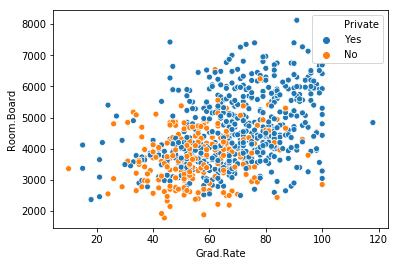

In [3]:
sns.scatterplot(x="Grad.Rate", y="Room.Board", data=df, hue='Private');

**Create a scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column.**

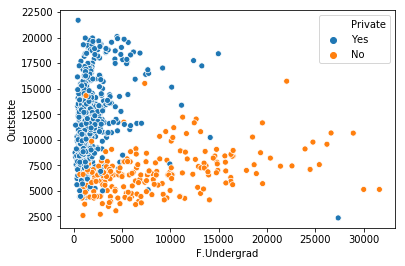

In [4]:
sns.scatterplot(x="F.Undergrad", y="Outstate", data=df, hue='Private');

**Create a stacked histogram showing Out of State Tuition based on the Private column. Try doing this using [sns.FacetGrid](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.FacetGrid.html). If that is too tricky, see if you can do it just by using two instances of pandas.plot(kind='hist').**

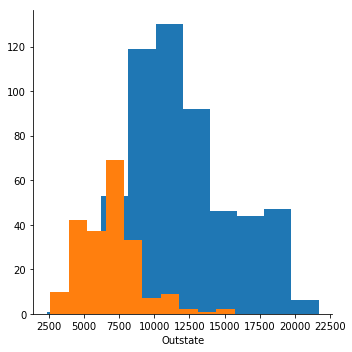

In [5]:
g = sns.FacetGrid(df,  hue="Private", height=5)
g = g.map(plt.hist, 'Outstate')

**Create a similar histogram for the Grad.Rate column.**

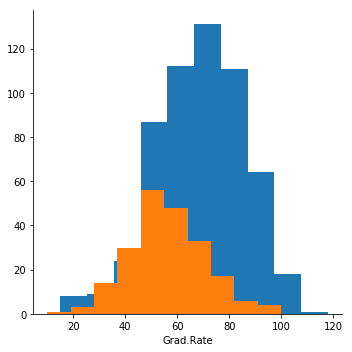

In [6]:
g = sns.FacetGrid(df,  hue="Private", height=5)
g = g.map(plt.hist, 'Grad.Rate')

**Notice how there seems to be a uni with a graduation rate of higher than 100%. That seems strange... find out that name of that school. Set that school's graduation rate to 100 so it makes sense. You may get a warning not an error) when doing this operation, so use dataframe operations or just re-do the histogram visualization to make sure it actually went through.**

In [7]:
df.loc[df['Grad.Rate'] > 100, 'Grad.Rate'] = 100

**recreate the histogram for the Grad.Rate column to ensure that none of the schools don't have a grad rate > 100%.**

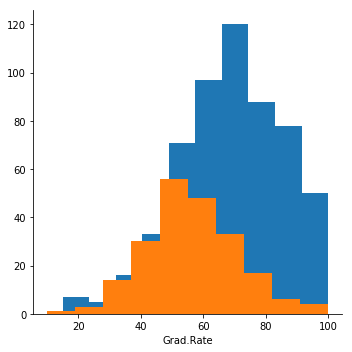

In [8]:
g = sns.FacetGrid(df,  hue="Private", height=5)
g = g.map(plt.hist, 'Grad.Rate')

## K Means Cluster Algorith Initialization & Training

**Here is the part where YOU WILL HAVE TO DROP THE 'Private' field otherwise you will be including that in the parameters used to fit your model.**

*Import KMeans from SciKit Learn... or just run the cell below since we've already done this to save time for you.*

In [9]:
from sklearn.cluster import KMeans

**Remember to set 'inplace=True' and check to ensure it has been dropped before fitting your kmeans model model**

In [10]:
#df.drop(columns=['Private'], inplace=True)

**Create an instance of a K Means model with 2 clusters, you don't have to set the 'random_state=1' but it's generally a good practice. This step IS NOT actually fitting anything to the prepackaged kmeans model, it just creates a model variable for you to call on when fitting your data. We will actually fit our data to our newly instatiated model in the next step**

In [11]:
kmeans = KMeans(n_clusters=2, random_state=1)

## Fit the model to all the data.

[sklearn: kmeans documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [12]:
kmeans.fit(df.drop(columns=['Private']))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

**What are '.cluster_centers' & '.labels_'?**

In [13]:
kmeans.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

In [14]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Visualizing centriod location vs labeled data.

**(Skip to the next section if time is of the essence)**

## Model Performance Evaluation

There is no ideal way to evaluate clustering if you don't have the labels, however since this is just an exercise, we do have the labels. You will now take advantage of this to evaluate our clustering model. Note this step is different to model validation which we will do in the next step. Use the documentation links for help.

[sklearn: confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

[sklearn: classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [15]:
df['cluster_labels'] = df['Private'].apply(lambda x: 1 if x == 'Yes' else 0)

In [16]:
from sklearn.metrics import confusion_matrix, classification_report

**Create a confusion matrix and classification report to see how well the Kmeans clustering worked without being given any labels. We've provided the methods below to help save time**

In [17]:
print(confusion_matrix(df.cluster_labels, kmeans.labels_))

[[138  74]
 [531  34]]


In [18]:
print(classification_report(df.cluster_labels, kmeans.labels_))

              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

   micro avg       0.22      0.22      0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777



## Model Validation Evaluation

**Please refer to the cluster diagnosis lesson to draw inspiration on how to evaluate your model in this next section. We've given your the libraries required to achieve all this in the cell below**

In [19]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics
import matplotlib.cm as cm

## Silhouette Plot

For n_clusters = 2, silhouette score is 0.32647241415140915)
For n_clusters = 3, silhouette score is 0.32647241415140915)
For n_clusters = 4, silhouette score is 0.32647241415140915)
For n_clusters = 5, silhouette score is 0.32647241415140915)


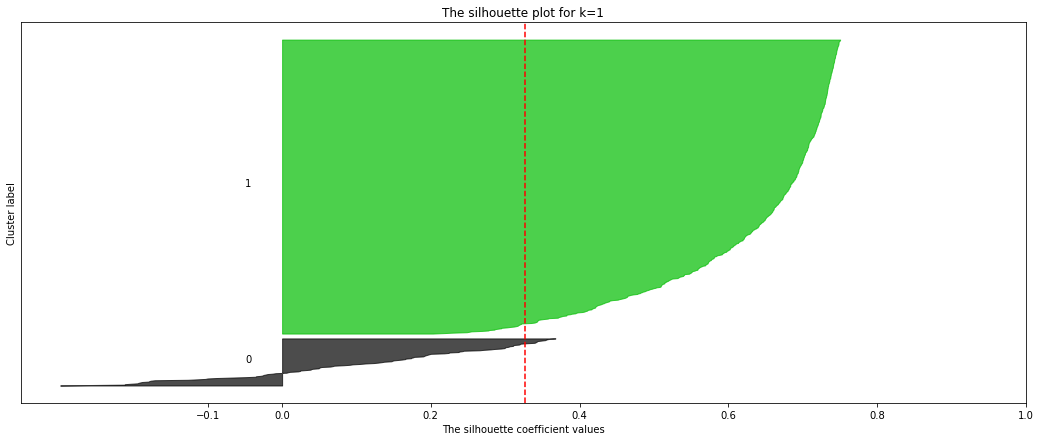

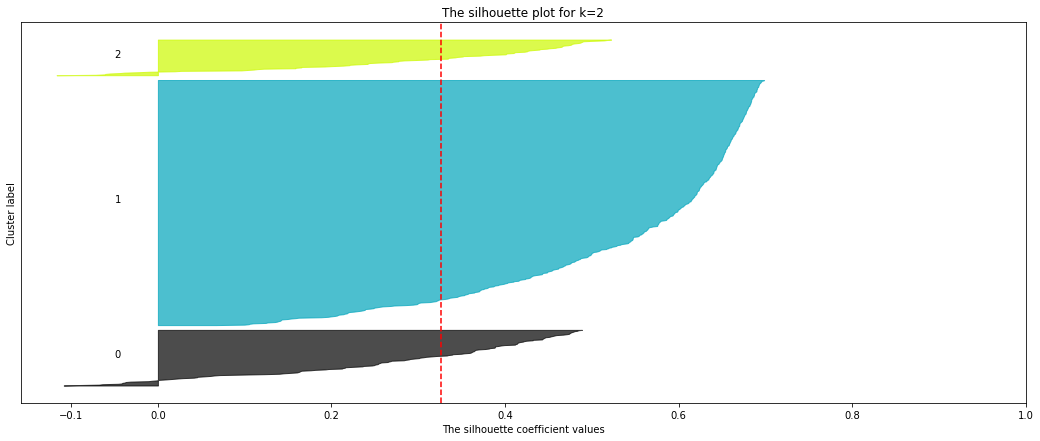

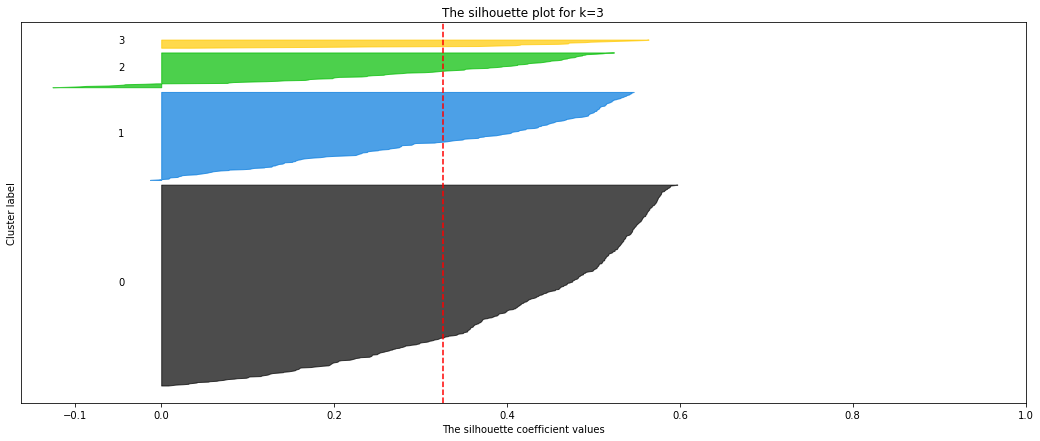

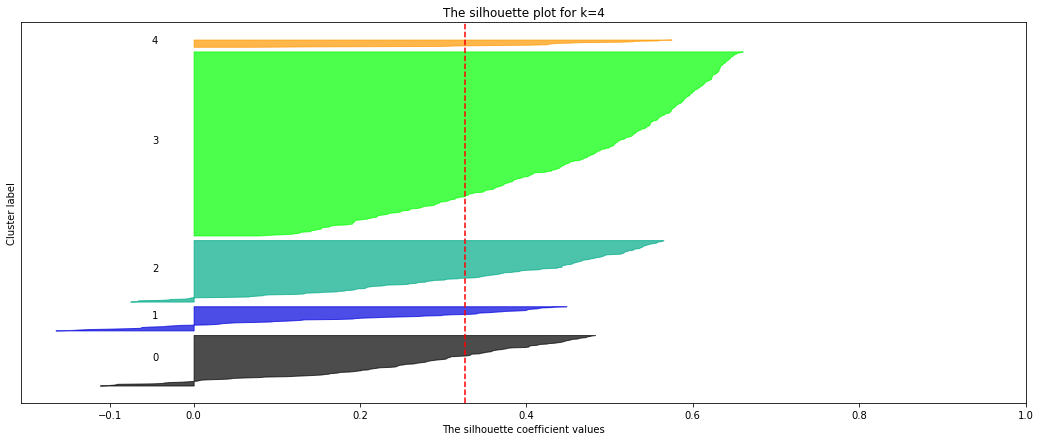

In [21]:
range_n_clusters = [2, 3, 4, 5]
for n_clusters in range_n_clusters:
    
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    
    clusterer = KMeans (n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(df.drop(columns=['Private']))
    centers = clusterer.cluster_centers_
    silhouette_avg = silhouette_score (df.drop(columns=['Private']), df.cluster_labels, metric='euclidean')
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, silhouette_avg))
    
    sample_silhouette_values = silhouette_samples(df.drop(columns=['Private']), cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for k={}".format(i))
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    

## Elbow Method

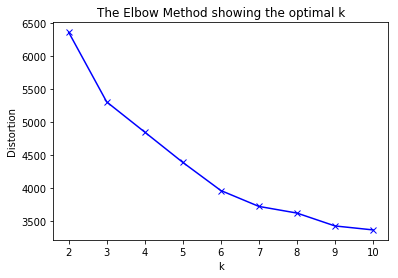

In [23]:
from scipy.spatial.distance import cdist
distortions = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters).fit(df.drop(columns=['Private']))
    distortions.append(sum(np.min(cdist(df.drop(columns=['Private']), kmeans.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

plt.plot(range_n_clusters, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# APPENDIX

## How to read a confusion matrix - Key Terms:

[Metrics: Classification Report](http://joshlawman.com/metrics-classification-report-breakdown-precision-recall-f1/)

- **true positives (TP)**: These are cases in which we predicted yes (they have the disease), and they do have the disease.
- **true negatives (TN)**: We predicted no, and they don't have the disease.
- **false positives (FP)**: We predicted yes, but they don't actually have the disease. (Also known as a "Type I error.")
- **false negatives (FN)**: We predicted no, but they actually do have the disease. (Also known as a "Type II error.")


- **Accuracy**: Overall, how often is the classifier correct? (TP+TN)/total = (100+50)/165 = 0.91
- **True Positive Rate**: When it's actually yes, how often does it predict yes? TP/actual yes = 100/105 = 0.95 -- also known as **"Sensitivity" or "Recall"**
- **False Positive Rate**: When it's actually no, how often does it predict yes? FP/actual no = 10/60 = 0.17
- **True Negative Rate**: When it's actually no, how often does it predict no? TN/actual no = 50/60 = 0.83, equivalent to 1 minus False Positive Rate also known as **"Specificity"**
- **Precision**: When it predicts yes, how often is it correct? TP/predicted yes = 100/110 = 0.91 
- **Prevalence**: How often does the yes condition actually occur in our sample? actual yes/total = 105/165 = 0.64
- **Misclassification Rate**: Overall, how often is it wrong? (FP+FN)/total = (10+5)/165 = 0.09 -- (equivalent to 1 minus Accurac), also known as **"Error Rate"**

### Key Definitions:

- **Precision**: Precision is the ability of a classiifer not to label an instance positive that is actually negative. For each class it is defined as as the ratio of true positives to the sum of true and false positives. Said another way, “for all instances classified positive, what percent was correct?”

- **Recall**: Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives. Said another way, “for all instances that were actually positive, what percent was classified correctly?”

- **F1 score**: The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

- **Support**: Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

# END